# MobileNet Model in Keras - Digits Signs

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.applications import ResNet50, MobileNetV2
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model   
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img, img_to_array
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:

In [2]:
X = np.load('../Language_digits/X.npy')
Y = np.load('../Language_digits/Y.npy')


In [3]:
def plot_digits_colidx(X, Y):
    plt.figure(figsize=(10,10))
    plt.plot([5, 2, 11])
    for i in col_idx:
        ax = plt.subplot(5, 2, i+1)
        ax.set_title("Column_idx: " + str(i))
        plt.axis('off')
        plt.imshow(X[np.argwhere(Y[:,i]==1)[0][0],:], cmap='gray')

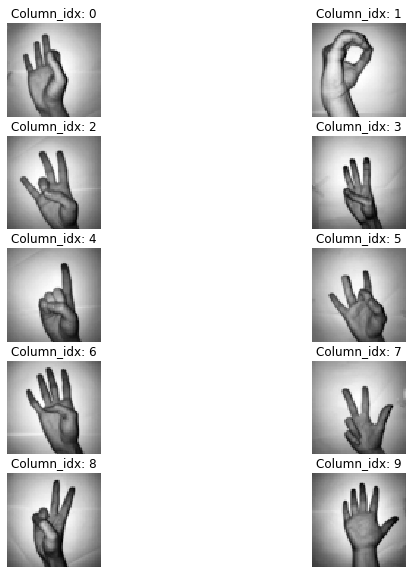

In [4]:
N_classes = Y.shape[1]
col_idx = [i for i in range(N_classes)]
plot_digits_colidx(X, Y)

In [5]:
#dictionary that handles the column index - digit relatinship
colidx_digit = {0: 9,
                1: 0,
                2: 7,
                3: 6,
                4: 1,
                5: 8,
                6: 4,
                7: 3,
                8: 2,
                9: 5}

#digit - column index relationship dictionary
digit_colidx = {v: k for k, v in colidx_digit.items()}

In [6]:
#create empty matrix
Y_ordered = np.zeros(Y.shape)
#fill the matrix so that the columns index also corresponds to the digit
for i in range(N_classes):
    Y_ordered[:, i] = Y[:, digit_colidx[i]]

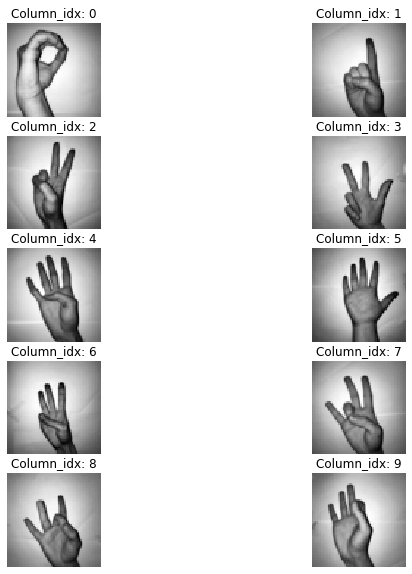

In [7]:
plot_digits_colidx(X, Y_ordered)

In [8]:
X.shape

(2062, 64, 64)

In [9]:
X_flat = np.array(X).reshape((2062, 64*64))
X_flat.shape

(2062, 4096)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [11]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 1443
number of test examples = 619
X_train shape: (1443, 4096)
y_train shape: (1443, 10)
X_test shape: (619, 4096)
y_test shape: (619, 10)


In [12]:
width = 64
height = 64
channels = 1

X_train = X_train.reshape(X_train.shape[0], width, height, channels)
X_test = X_test.reshape(X_test.shape[0], width, height, channels)

In [13]:
X_train_vide = np.empty([X_train.shape[0], X_train.shape[1], X_train.shape[2], 3])
X_train_vide[..., :] = X_train[..., :]
X_train = X_train_vide

In [14]:
X_test_vide = np.empty([X_test.shape[0], X_test.shape[1], X_test.shape[2], 3])
X_test_vide[..., :] = X_test[..., :]
X_test = X_test_vide

In [15]:
print ("X_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_test.shape))

X_train shape: (1443, 64, 64, 3)
X_test shape: (619, 64, 64, 3)


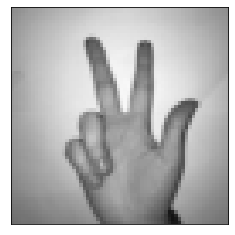

In [16]:
plt.imshow(X_train[10]);
plt.xticks([]), plt.yticks([]);

In [18]:
from keras.applications.mobilenet import MobileNet
model = MobileNet()
print(model.summary())

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import tensorflow as tf

seed = 7
np.random.seed(seed)
tf.set_random_seed(seed)
#tf.random.set_seed(seed)

pre_model = MobileNet(include_top=False, input_shape=(64,64,3), alpha=1.0, depth_multiplier=1, dropout=1e-3, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model = Sequential()
model.add(pre_model)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

C:\Users\Utilisateur\Anaconda3\envs\computervision\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [19]:
from keras.optimizers import SGD, Adamax
model.compile(loss='categorical_crossentropy',
              optimizer='Adamax',
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, 
          batch_size=X_train.shape[0], epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1443 samples, validate on 619 samples
Epoch 1/10
1443/1443 [==============================] - 74s 51ms/step - loss: 4.0341 - acc: 0.0929 - val_loss: 8.1059 - val_acc: 0.3667
Epoch 2/10
1443/1443 [==============================] - 67s 47ms/step - loss: 1.8730 - acc: 0.5821 - val_loss: 3.9062 - val_acc: 0.6155
Epoch 3/10
1443/1443 [==============================] - 67s 46ms/step - loss: 0.5346 - acc: 0.8642 - val_loss: 2.1136 - val_acc: 0.7496
Epoch 4/10
1443/1443 [==============================] - 67s 47ms/step - loss: 0.2456 - acc: 0.9397 - val_loss: 2.2115 - val_acc: 0.7221
Epoch 5/10
1443/1443 [==============================] - 67s 46ms/step - loss: 0.1260 - acc: 0.9702 - val_loss: 2.2447 - val_acc: 0.7270
Epoch 6/10
1443/1443 [==============================] - 68s 47ms/step - loss: 0.0747 - acc: 0.9841 - val_loss: 2.3462 - val_acc: 0.7205
Epoch 7/10
1443/1443 [==============================] - 72s 50ms/step - loss: 0.0473 - ac

In [21]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

619/619 [==============================] - 5s 8ms/step
Loss = 1.813682283453872
Test Accuracy = 0.7592891764756359


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 2, 2, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40970     
Total params: 3,269,834
Trainable params: 3,247,946
Non-trainable params: 21,888
_________________________________________________________________


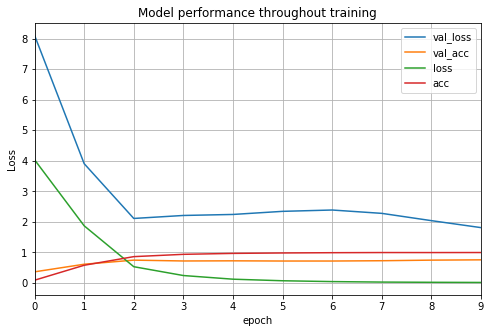

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
# Predict.
predictions = model.predict(X_test)

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(np.argmax(y_test, axis=1)) 

[6 9 6 9 0 1 4 2 5 6 4 9 7 1 3 3 0 5 6 7 0 4 6 6 9 6 7 6 6 9 8 5 4 6 4 6 6
 1 9 1 7 7 3 1 1 6 6 7 8 9 1 9 6 6 1 0 6 8 6 8 8 7 2 7 6 9 6 3 6 4 1 1 1 7
 4 9 9 4 6 8 3 6 2 0 6 6 6 4 1 6 5 4 7 4 7 4 2 6 8 7 6 0 9 0 2 1 7 8 8 7 1
 8 3 3 2 6 6 1 5 6 5 5 1 5 8 2 6 5 1 0 6 1 9 9 4 3 8 9 6 6 3 6 6 6 6 1 6 6
 5 4 9 6 1 1 6 2 6 6 1 1 7 6 9 4 6 2 4 7 6 6 4 3 6 9 1 6 7 6 6 6 1 7 4 4 1
 6 3 2 4 2 8 6 8 3 2 0 8 4 8 5 4 7 0 3 6 4 2 5 2 8 9 0 2 4 5 3 1 6 5 6 6 4
 6 1 7 5 4 1 9 5 8 4 7 6 3 1 6 4 6 4 6 6 1 0 9 0 1 6 6 9 5 4 3 6 0 8 2 5 9
 6 4 7 6 4 6 7 6 7 7 1 1 1 4 9 5 7 7 3 1 7 5 3 6 9 1 9 3 9 8 3 6 7 0 8 6 6
 5 6 1 6 6 3 6 3 8 3 6 9 6 9 6 6 1 6 9 4 6 3 0 2 5 8 0 6 1 2 8 6 3 1 0 4 1
 6 2 6 9 7 9 4 8 3 6 0 5 9 2 5 5 9 4 7 7 4 8 1 0 7 0 1 1 9 1 9 9 7 6 4 6 6
 5 3 1 1 1 5 4 0 6 4 7 8 1 4 6 3 8 9 9 7 6 0 2 8 6 8 0 4 1 2 2 6 5 6 1 2 0
 5 6 3 1 6 1 5 9 6 0 4 2 6 6 7 6 7 4 4 4 8 8 4 4 4 6 4 6 7 7 4 6 3 1 6 3 9
 1 7 0 1 5 4 8 4 7 2 1 2 6 7 3 3 4 0 8 1 6 0 3 3 1 7 6 9 5 4 6 7 4 3 5 4 6
 4 6 7 1 6 6 1 6 3 1 6 7 

In [25]:
predictions.shape

(619, 10)

In [26]:
y_test.shape

(619, 10)

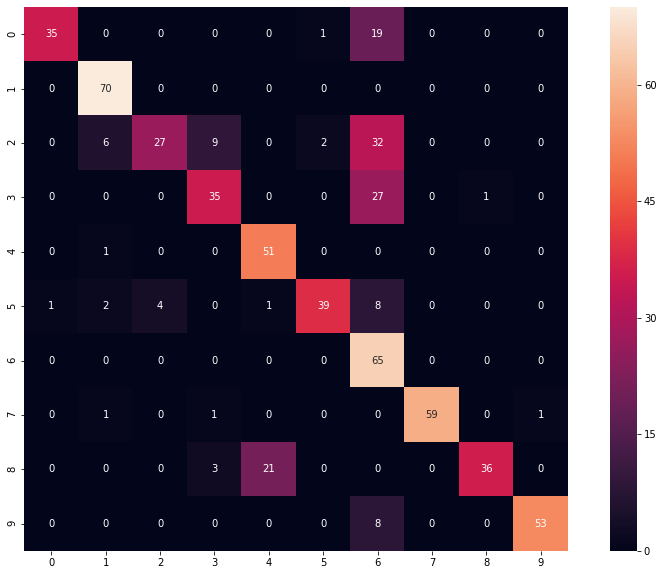

accuracy :75.92891760904685 %


In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

y_train_class = y_test.argmax(axis=1)
y_pred_class = predictions.argmax(axis=1)
conf_mat = confusion_matrix(y_train_class, y_pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,square=True, annot=True, fmt='.0f')
plt.show()
print("accuracy :" + str(accuracy_score(y_train_class, y_pred_class)*100)+" %")